# **YOLOE for prompt detection**

Install Ultralytics library

In [1]:
%pip install -qqq -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.9 MB/s eta 0:00:00:00:0100:01
Note: you may need

In [2]:
%pip show ultralytics

Name: ultralytics
Version: 8.3.178
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, torch, torchvision, tqdm, ultralytics-thop
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## **Imports**

In [3]:
from ultralytics import YOLO
import os
import sys
import shutil
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Object detection**

In [4]:
!mkdir /kaggle/working/videos

#### **Load YOLOE prompt-free model**

In [5]:
model = YOLO("yoloe-11m-seg.pt")

#### **Class definition**

In [6]:
names = ["person","laptop","lamp","flowerpot","table"]

In [7]:
model.set_classes(names, model.get_text_pe(names))

requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect



#### **Set input video**

In [8]:
video_path = "/kaggle/input/video-yoloe-test/7252624-hd_1920_1080_25fps.mp4" # Path to input video
cap = cv2.VideoCapture(video_path)

#### **Getting video properties**

In [9]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width of frame of video
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # height of frame of video
fps = int(cap.get(cv2.CAP_PROP_FPS)) # video frame rate

#### **Output video settings**

In [10]:
output_path = "/kaggle/working/videos/output_video_detection.mp4" # path of output video
fourcc = cv2.VideoWriter_fourcc(*"mp4v") # video codec settings
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height)) # set output

#### **Use model**

In [11]:
sample_frames = [] # List for showing images

In [12]:
# Video processing
frame_count = 0
max_frames_to_show = 3  # Number of images to display on the laptop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detekce na snímku
    results = model.predict(frame, conf=0.6)  # conf=0.6 is the threshold value

    # Plot detections per frame
    annotated_frame = results[0].plot(boxes=True, masks=False)  # View Object Detections

    # Save annotated image to output video
    out.write(annotated_frame)

    # Save multiple images for viewing on a laptop
    if frame_count < max_frames_to_show:
        sample_frames.append(annotated_frame)
    frame_count += 1


0: 384x640 2 persons, 1 laptop, 1 lamp, 71.2ms
Speed: 10.4ms preprocess, 71.2ms inference, 334.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 1 table, 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 1 table, 31.7ms
Speed: 2.2ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 1 table, 31.6ms
Speed: 2.2ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 1 lamp, 1 table, 31.6ms
Speed: 2.3ms preprocess, 31.6ms inference, 

#### **Resource release**

In [13]:
cap.release()
out.release()

#### **View sample images**

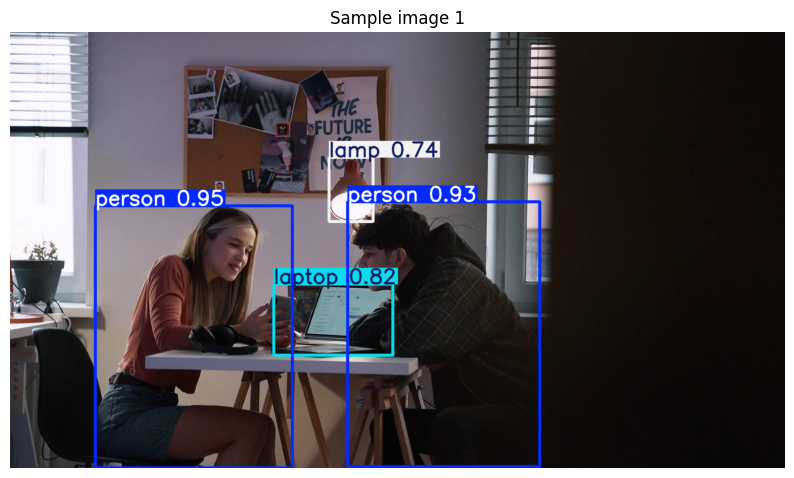

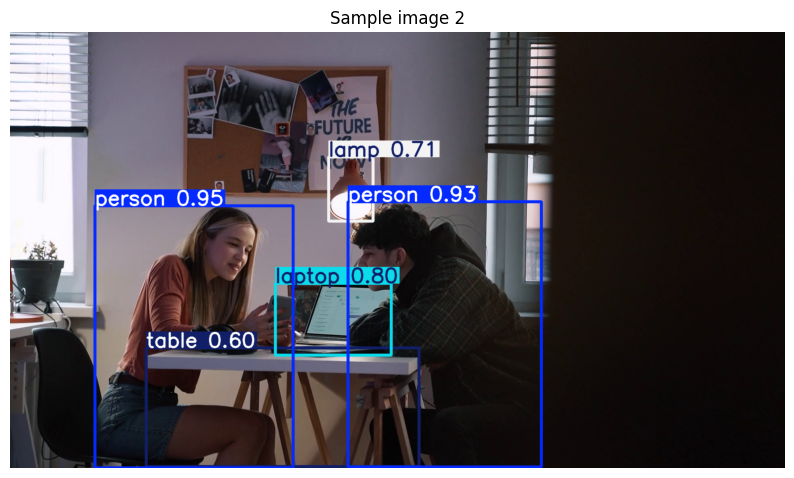

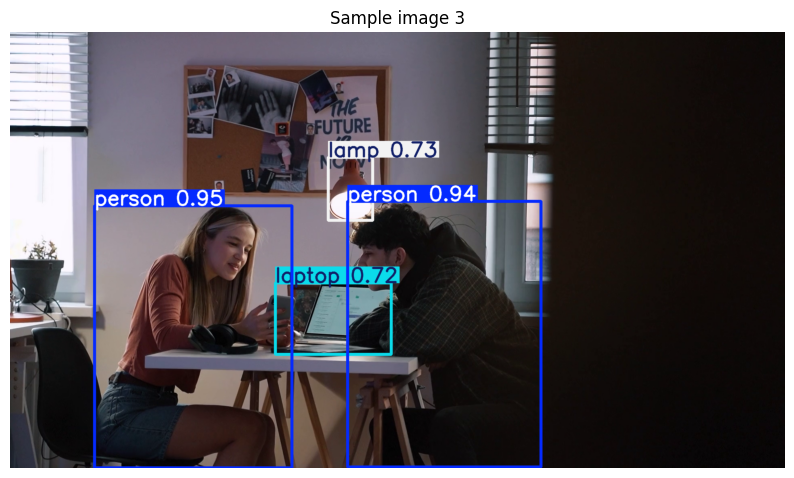

In [14]:
for i, frame in enumerate(sample_frames):
    # Convert BGR (OpenCV) to RGB (for matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Sample image {i+1}")
    plt.axis("off")
    plt.show()

In [15]:
print(f"Processed video saved as {output_path}")

Processed video saved as /kaggle/working/videos/output_video_detection.mp4


## **Instant segmentation**

#### **Class definition**

In [16]:
names = ["person sitting"]

In [17]:
model.set_classes(names, model.get_text_pe(names))

#### **Set input video**

In [18]:
video_path = "/kaggle/input/video-yoloe-test/7252624-hd_1920_1080_25fps.mp4" # Path to input video
cap = cv2.VideoCapture(video_path)

#### **Getting video properties**

In [19]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width of frame of video
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # height of frame of video
fps = int(cap.get(cv2.CAP_PROP_FPS)) # video frame rate

#### **Output video settings**

In [20]:
output_path = "/kaggle/working/videos/output_video_instance_segmentation.mp4" # path of output video
fourcc = cv2.VideoWriter_fourcc(*"mp4v") # video codec settings
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height)) # set output

#### **Use model**

In [21]:
sample_frames = [] # List for showing images

In [22]:
# Video processing
frame_count = 0
max_frames_to_show = 3  # Number of images to display on the laptop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detekce na snímku
    results = model.predict(frame, conf=0.5)  # conf=0.5 is the threshold value

    # Plot detections per frame
    annotated_frame = results[0].plot(boxes=True, masks=True)  # View Instance Segmentation

    # Save annotated image to output video
    out.write(annotated_frame)

    # Save multiple images for viewing on a laptop
    if frame_count < max_frames_to_show:
        sample_frames.append(annotated_frame)
    frame_count += 1


0: 384x640 2 person sittings, 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 29.1ms
Speed: 2.0ms preprocess, 29.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 29.1ms
Speed: 2.2ms preprocess, 29.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 29.1ms
Speed: 2.2ms preprocess, 29.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 24.4ms
Speed: 2.1ms preprocess, 24.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 person sittings, 24.4ms
Speed: 2.2ms prep

#### **Resource release**

In [23]:
cap.release()
out.release()

#### **View sample images**

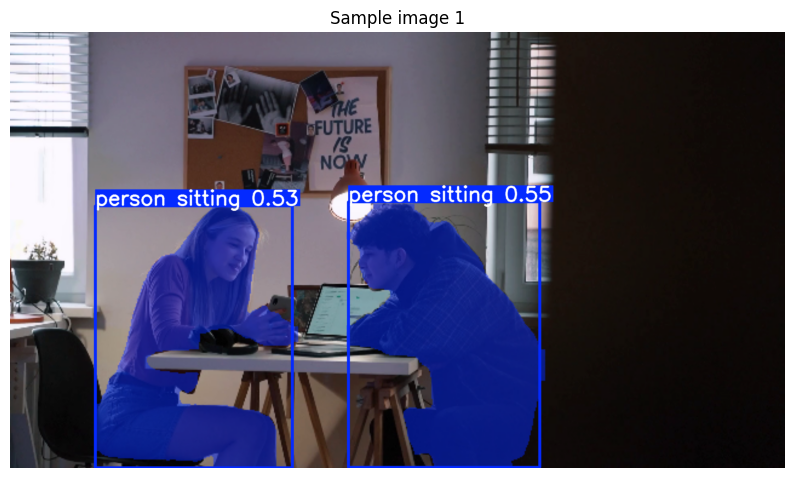

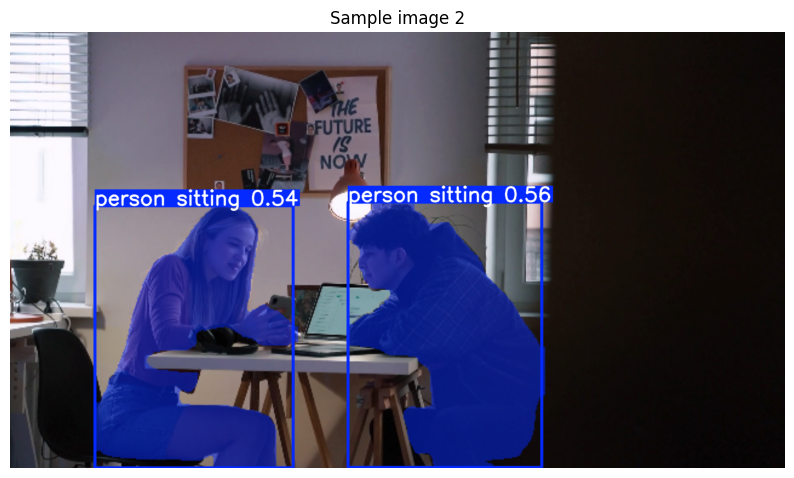

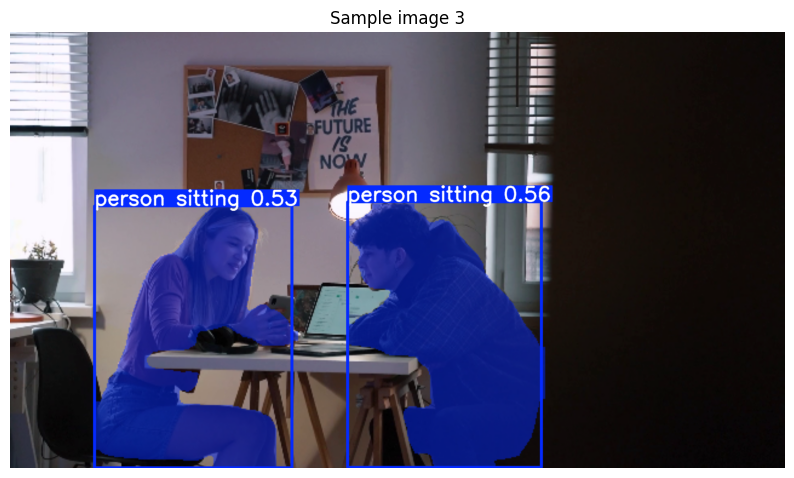

In [24]:
for i, frame in enumerate(sample_frames):
    # Convert BGR (OpenCV) to RGB (for matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Sample image {i+1}")
    plt.axis("off")
    plt.show()

In [25]:
print(f"Processed video saved as {output_path}")

Processed video saved as /kaggle/working/videos/output_video_instance_segmentation.mp4


## **Zip videos**

In [26]:
def zip_folder_with_shutil(source_folder, output_path):
    '''Function for zip dir data'''
    shutil.make_archive(output_path, 'zip', source_folder)

In [27]:
zip_folder_with_shutil('/kaggle/working/videos', '/kaggle/working/videos')

## **Resources**

- [Ultralytics YOLO Docs YOLOE (Real-Time Seeing Anything)](https://docs.ultralytics.com/models/yoloe/#use-cases-and-applications)
- [How to use YOLOE with Ultralytics: Open Vocabulary & Real-Time Seeing Anything | Text/Visual Prompt](https://www.youtube.com/watch?v=HMOoM2NwFIQ)
- [Custom Object Detection Models Without Training | YOLOE & Raspberry Pi](https://core-electronics.com.au/guides/raspberry-pi/custom-object-detection-models-without-training-yoloe-and-raspberry-pi/)
- [YOLOE: Next Gen Computer Vision - Zero Training Required!](https://www.youtube.com/watch?app=desktop&v=yNPwsKa52zs&t=0)